Metric: Our metric we chose was saftey. This will be measured by crimes by neighbords, 311 reports, and number of crosswalks in each neighborhood

Police Blotter

Importing Pandas and enabling use of graphs


In [1]:
import pandas as pd
data = pd.read_csv("policeBlotter.csv")
import matplotlib.pyplot as plt
%matplotlib inline

Grouping the data by the neighborhood name

In [2]:
data.groupby("INCIDENTNEIGHBORHOOD").count()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,
Allegheny Center,18,18,18,18,18,18,18,18,18,18,18,12,12,12,12
Allegheny West,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Allentown,44,44,44,44,44,44,44,44,44,44,44,41,41,41,41
Arlington,27,27,27,27,27,27,27,27,27,27,27,22,22,22,22
Arlington Heights,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,10,10,10,10,10,10,10,10,10,10,10,6,6,6,6
West End,17,17,17,17,17,17,17,17,17,17,17,15,15,16,16
West Oakland,44,44,44,44,44,44,44,44,44,44,44,32,32,32,32


Grouping the data by the neighborhood name

In [3]:
data.groupby("INCIDENTNEIGHBORHOOD").count()


,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,
Allegheny Center,18,18,18,18,18,18,18,18,18,18,18,12,12,12,12
Allegheny West,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Allentown,44,44,44,44,44,44,44,44,44,44,44,41,41,41,41
Arlington,27,27,27,27,27,27,27,27,27,27,27,22,22,22,22
Arlington Heights,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,10,10,10,10,10,10,10,10,10,10,10,6,6,6,6
West End,17,17,17,17,17,17,17,17,17,17,17,15,15,16,16
West Oakland,44,44,44,44,44,44,44,44,44,44,44,32,32,32,32


This code creates a graph of each neighborhood and their amount of crimes

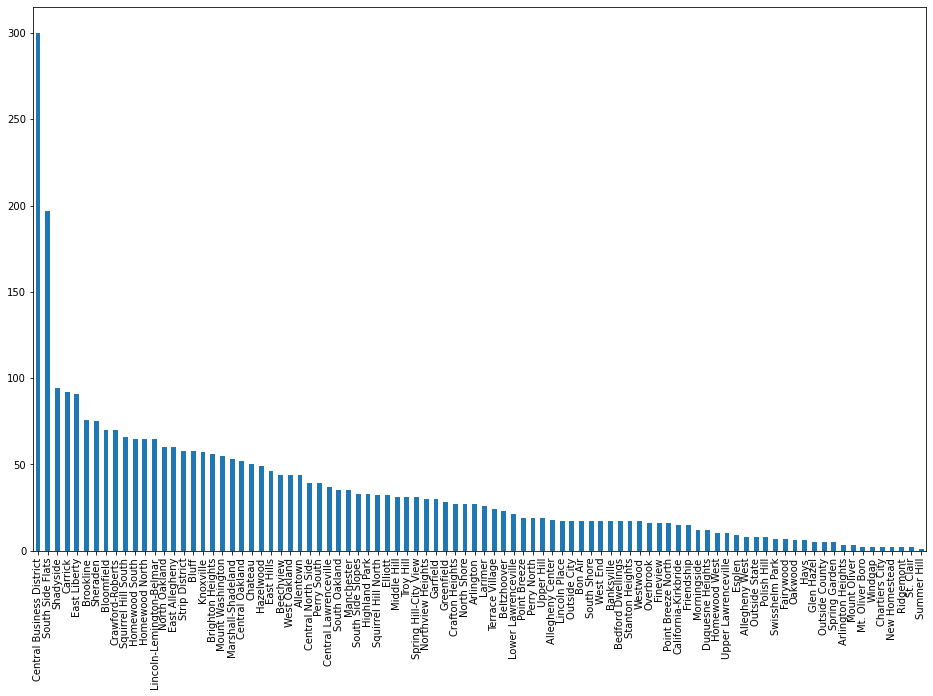

In [4]:
neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts()
plt.figure(figsize=(16, 10)) 
neighborhoods.plot(kind='bar')

plt.show()

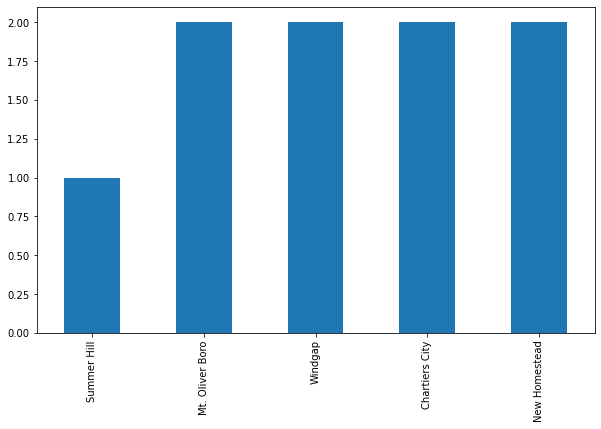

In [5]:
neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts()
bestNeighborhoods = neighborhoods.nsmallest(5)
plt.figure(figsize=(10, 6)) 
bestNeighborhoods.plot(kind='bar')

plt.show()



Merge Police Blotter data and 2015 census.
This enables us to see the amount of crimes in proportion to the population as well.

In [6]:
population = pd.read_csv('Pittsburgh_2015_census_data.csv')
neighborhoodsTwo = data.rename(columns = {'INCIDENTNEIGHBORHOOD': 'Neighborhood'})
mergedData = pd.merge(neighborhoodsTwo, population, on = 'Neighborhood')
mergedData.to_csv('merged_data.csv', index=False)

Read the merged data and display it after grouping by neighborhood. This gives us a dataset that has the offenses and population of each neighborhood


In [7]:

md = pd.read_csv("merged_data.csv", usecols = ['Neighborhood', 'Estimate; Total', 'OFFENSES'])
grouped_data = md.groupby('Neighborhood').agg({'OFFENSES': 'count', 'Estimate; Total': 'sum'}).reset_index()
grouped_data.head()

,Neighborhood,OFFENSES,Estimate; Total
0,Allegheny Center,18,25398.0
1,Allegheny West,8,2744.0
2,Allentown,44,112552.0
3,Arlington,27,50004.0
4,Arlington Heights,3,816.0


Next we will divide the population of each neighborhood by the amount of offenses to get a better understanding of the proportion of crime occuring.

In [8]:
grouped_data['Population/Offenses'] = grouped_data['Estimate; Total'] / grouped_data['OFFENSES']
grouped_data.head()

,Neighborhood,OFFENSES,Estimate; Total,Population/Offenses
0,Allegheny Center,18,25398.0,1411.0
1,Allegheny West,8,2744.0,343.0
2,Allentown,44,112552.0,2558.0
3,Arlington,27,50004.0,1852.0
4,Arlington Heights,3,816.0,272.0


This code will make a graph in which it displays the neighborhoods and their proportion of population/crime

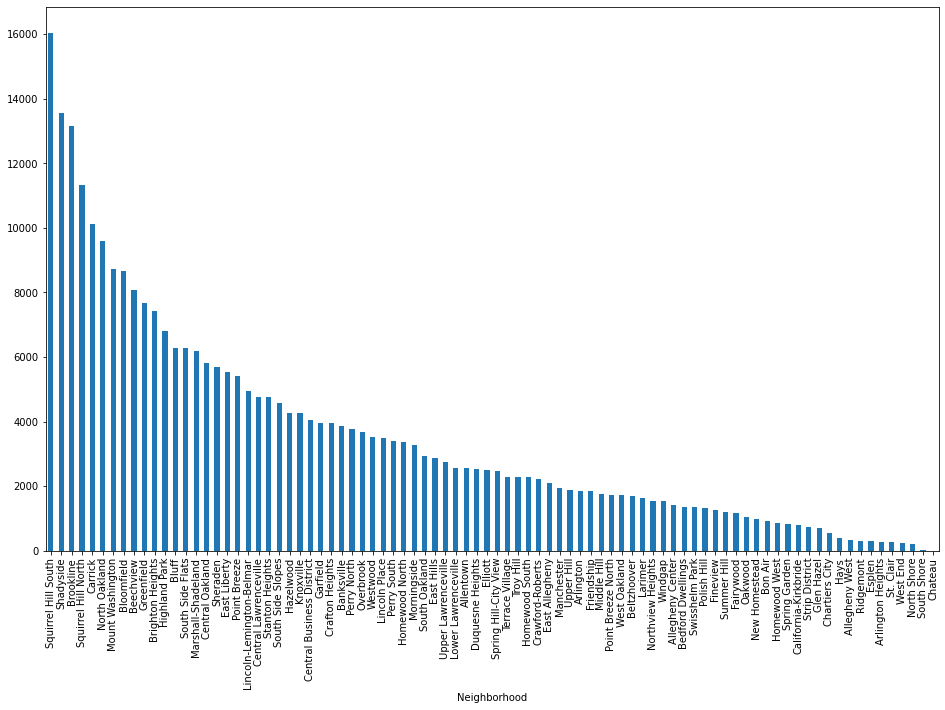

In [9]:
grouped_data = grouped_data.sort_values(by='Population/Offenses', ascending=False)
fig, ax = plt.subplots(figsize=(16, 10))
grouped_data.plot(x='Neighborhood', y='Population/Offenses', kind='bar', legend = False, ax = ax)
plt.show()

This new code will display the 5 neighborhoods with the lowest proportion of crime by population

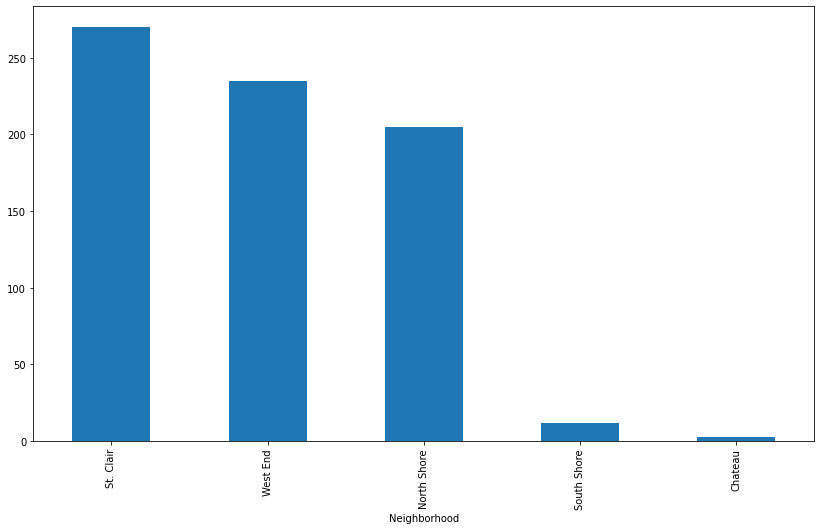

In [10]:
new_best_neighborhoods = grouped_data.tail(5)
fig, ax = plt.subplots(figsize=(14, 8))
new_best_neighborhoods.plot(x='Neighborhood', y='Population/Offenses', kind='bar', legend = False, ax = ax)
plt.show()

In conclusion, the best(safest) neighborhood based off crime data would be Chateau. My personal best would be St. Clair bc not only does it rank well in low crime per population I am also familiary with that area.

## 311 Reports
##### Broken Sidewalks, Broken Streetlights, Speeding, and Illegal Parking Statistics


### What is a 311 report?
311 reports are official requests from citizens that are sent to the city/local government. These reports range in request types, as you will be able to see below. The government takes these requests via their website or over the phone, gathers information about the request type- ranging from what type of request is being made, what department will be in charge of resolving the use, and lastly the location of where the individual is requesting the service.

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

data = pd.read_csv("311_reports2022_filtered.csv", index_col="_id", parse_dates=True)
population = pd.read_csv("Pittsburgh_2015_census_data.csv", index_col="_id")

## Exploring Request Types in the Data
As stated earlier, there are many different types of requests that can be made. The table below shows how many different types of requests were made by locals.

In [12]:
#gives the total types of 311 requests
display_types= data["REQUEST_TYPE"].value_counts()
print(display_types.head(15))

Weeds/Debris                            10438
Snow/Ice removal                         8899
Missed Refuse Pick Up                    7355
Potholes                                 5921
Referral                                 4638
Missed Recycling Pick Up                 3383
Illegal Parking                          2944
Abandoned Vehicle (parked on street)     2697
Question                                 2692
Refuse Violations                        2562
Litter, Public Property                  2181
Building Maintenance                     2113
Street Light - Repair                    1857
Blue Bin Containers                      1665
Overgrowth                               1522
Name: REQUEST_TYPE, dtype: int64


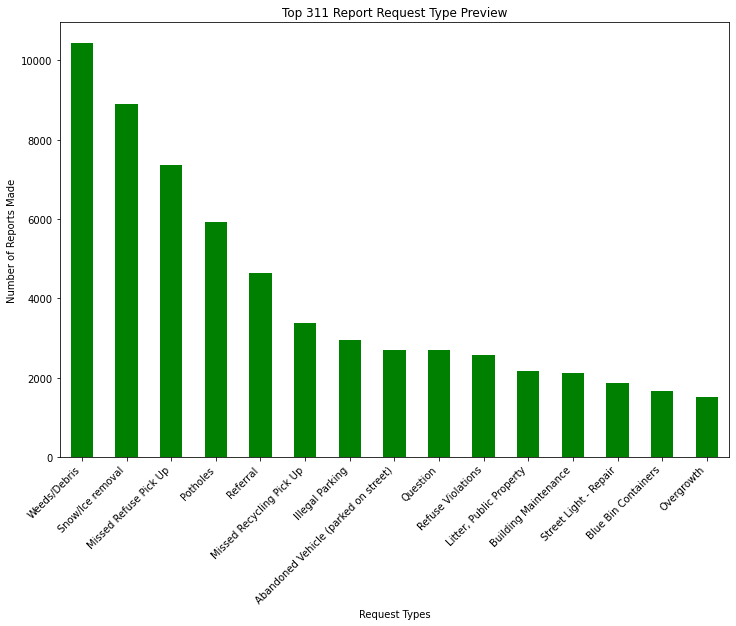

In [13]:
#gives the total types of 311 requests
display_types= data["REQUEST_TYPE"].value_counts().head(15)
#print(display_types.head(30))
plt.figure(figsize=(12,8)) #sets the width/height of our graph area
display_types.plot(kind='bar', color='green')
plt.title('Top 311 Report Request Type Preview')
plt.xlabel('Request Types')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right') #rotate the x labels 45 degrees to the right, easier to read
plt.show()

#### Total 311 Reports Per Neighborhood in 2022

In [14]:
#this prints out the number of total requests made for each neighborhood
total_ngh_reports=data["NEIGHBORHOOD"].value_counts().head(15)
print(total_ngh_reports)

Brookline                    4793
Carrick                      4256
South Side Flats             4081
South Side Slopes            3624
Squirrel Hill South          3597
Bloomfield                   3281
Mount Washington             2750
Central Business District    2709
Shadyside                    2296
Beechview                    2258
Greenfield                   2087
Brighton Heights             2046
Marshall-Shadeland           1865
Central Oakland              1758
Squirrel Hill North          1754
Name: NEIGHBORHOOD, dtype: int64


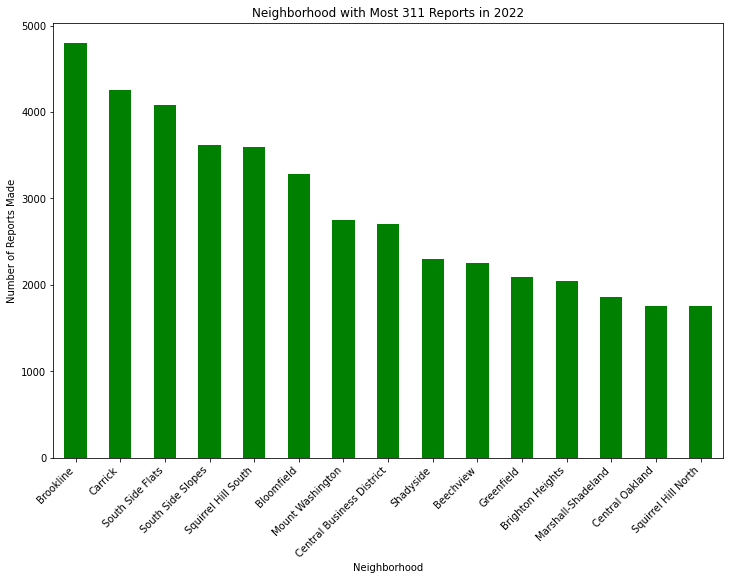

In [15]:
plt.figure(figsize=(12,8))
total_ngh_reports.plot(kind='bar', color='green')
plt.title('Neighborhood with Most 311 Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

## Finding Our Data Sets
I decided to focus on four separate metrics for this project- Broken Sidewalks, Illegal Parking, Street Light- Repair, and Speeding. Broken sidewalks can provide challenges to those who are disabled. Broken streetlights can be a tripping hazard for people will not be able to see where they are walking and also provide a sense of unsafety since they are unable to see clearly if others approach them. Illegal parking can prove to be an issue to pedestrians if they block certain sidewalks/crosswalks- preventing those individuals who are disabled from accessing the sidewalk. Finally, speeding can be catastrophic to pedestrians who are crossing the street.

In [16]:
#declaring our dictionaries
sidewalk_dict= {}
streetlight_dict= {}
parking_dict={}
speeding_dict={}

#filtering the data by our desired queries
filtered_data= data[data["REQUEST_TYPE"]=="Broken Sidewalk"]
filtered_data_p= data[data["REQUEST_TYPE"]=="Illegal Parking"]
filtered_data_sl= data[data["REQUEST_TYPE"]=="Street Light - Repair"]
filtered_data_s= data[data["REQUEST_TYPE"]=="Speeding"]

#for broken sidewalk:
for index,row in filtered_data.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Broken Sidewalk"):
        if (ngh not in sidewalk_dict):
            sidewalk_dict[ngh]=1
        elif (ngh in sidewalk_dict):
            sidewalk_dict[ngh]+=1
            
#for broken street lights
for index,row in filtered_data_sl.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Street Light - Repair"):
        if (ngh not in streetlight_dict):
            streetlight_dict[ngh]=1
        elif (ngh in streetlight_dict):
            streetlight_dict[ngh]+=1
            
#for illegal parking:
for index,row in filtered_data_p.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Illegal Parking"):
        if (ngh not in parking_dict):
            parking_dict[ngh]=1
        elif (ngh in parking_dict):
            parking_dict[ngh]+=1

#for speeding violations:
for index,row in filtered_data_s.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Speeding"):
        if (ngh not in speeding_dict):
            speeding_dict[ngh]=1
        elif (ngh in speeding_dict):
            speeding_dict[ngh]+=1

streetlight_series= pd.Series(streetlight_dict)
sidewalk_series= pd.Series(sidewalk_dict)
parking_series= pd.Series(parking_dict)
speeding_series=pd.Series(speeding_dict)


## Explanation:
I started off by creating dictionaries of the data sets that I wanted to analyze. I selected the REQUEST_TYPE row and counted the total number of reports for each neighborhood. If the neighborhood was present in the dictionary, I added one to the neighborhood dictionary value. If the neighborhood was not present, I added it to the dictionary and gave it a value of 1.

## Visualizing the Data: Sidewalks
Now that we have created a series, we can make a graph of the values. However, my data is not sorted from greatest to least. Since it adds the neighborhood whenever it is first mention, the location of the neighborhoods in my array depend on when the neighborhood's first report was made. We can change that by sorting the dictionary items by their values.

In [17]:
print("Before the Sort:")
print("\nBroken Sidewalks: \n---------------------------------")
print(sidewalk_dict)


Before the Sort:

Broken Sidewalks: 
---------------------------------
{'Bloomfield': 22, 'Squirrel Hill North': 38, 'Elliott': 5, 'Strip District': 10, 'Carrick': 15, 'East Liberty': 27, 'Hays': 2, 'Polish Hill': 6, 'East Allegheny': 10, 'Homewood South': 6, 'Brighton Heights': 13, 'Shadyside': 42, 'Central Business District': 56, 'Squirrel Hill South': 58, 'North Oakland': 16, 'Friendship': 4, 'Mount Washington': 23, 'South Oakland': 18, 'West Oakland': 3, 'Bon Air': 1, 'Point Breeze': 19, 'Windgap': 5, 'Bluff': 10, 'Beechview': 16, 'Brookline': 37, 'Oakwood': 1, nan: 12, 'Point Breeze North': 12, 'South Side Flats': 82, 'Lower Lawrenceville': 16, 'Crafton Heights': 7, 'Central Lawrenceville': 25, 'Hazelwood': 11, 'Duquesne Heights': 5, 'Central Oakland': 13, 'Allegheny West': 6, 'Central Northside': 24, 'Perry North': 12, 'North Shore': 3, 'Sheraden': 6, 'Stanton Heights': 4, 'Allentown': 4, 'South Side Slopes': 19, 'Marshall-Shadeland': 3, 'Overbrook': 2, 'Larimer': 7, 'Greenfield'

### Sorting the Data and Graphing

Broken Sidewalks
--------------------------------
South Side Flats             82
Squirrel Hill South          58
Central Business District    56
Shadyside                    42
Squirrel Hill North          38
Brookline                    37
East Liberty                 27
Central Lawrenceville        25
Central Northside            24
Mount Washington             23
Bloomfield                   22
South Side Slopes            19
Greenfield                   19
Point Breeze                 19
South Oakland                18
dtype: int64


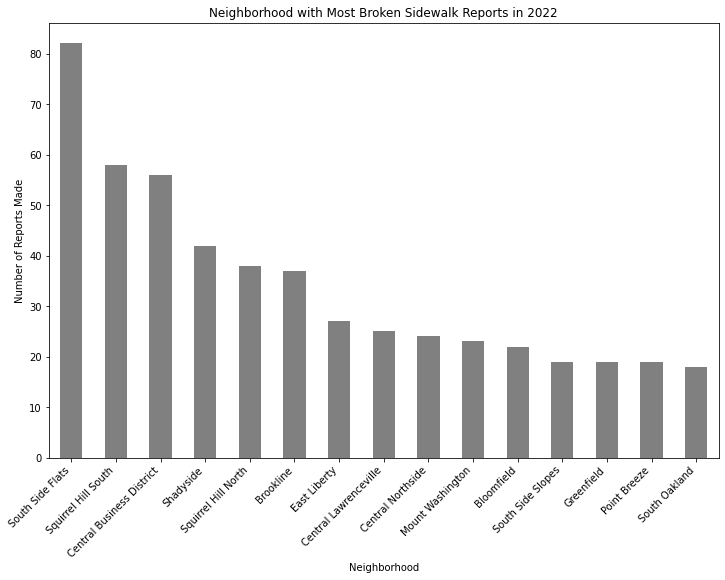

In [18]:
print("Broken Sidewalks")
print("--------------------------------")
sidewalk_series_sorted= sidewalk_series.sort_values(ascending=False)
print(sidewalk_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
sidewalk_series_sorted.head(15).plot(kind='bar', color='gray')
plt.title('Neighborhood with Most Broken Sidewalk Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()


Broken Streetlights
--------------------------------
Brookline                    93
Squirrel Hill South          93
Central Business District    69
Shadyside                    68
Carrick                      64
Bloomfield                   54
Beechview                    49
South Side Slopes            49
Greenfield                   47
Squirrel Hill North          45
Brighton Heights             45
Mount Washington             45
Lincoln-Lemington-Belmar     41
Sheraden                     38
South Side Flats             33
dtype: int64


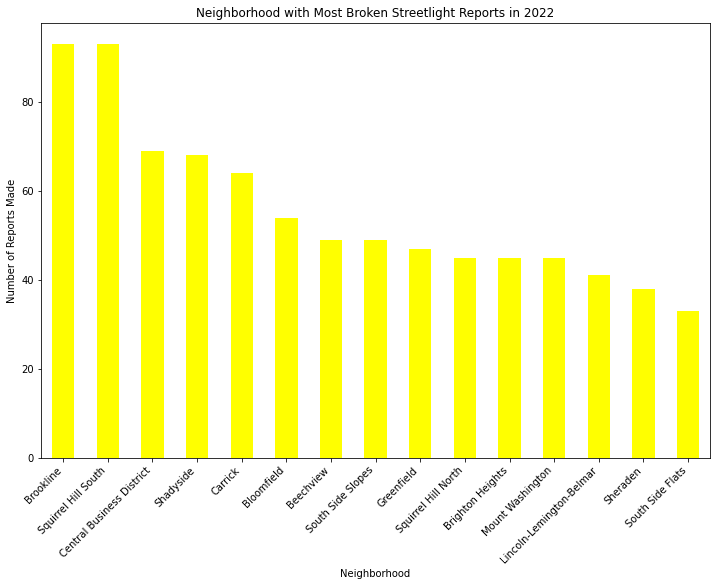

In [19]:
print("Broken Streetlights")
print("--------------------------------")
streetlight_series_sorted= streetlight_series.sort_values(ascending=False)
print(streetlight_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
streetlight_series_sorted.head(15).plot(kind='bar', color='yellow')
plt.title('Neighborhood with Most Broken Streetlight Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

Illegal Parking
--------------------------------
Central Business District    457
Bloomfield                   165
Strip District               138
South Side Flats             109
East Liberty                  95
Central Lawrenceville         95
Brookline                     94
Squirrel Hill South           91
Central Oakland               82
North Oakland                 80
Carrick                       76
Mount Washington              72
Shadyside                     69
Greenfield                    65
Lower Lawrenceville           62
dtype: int64


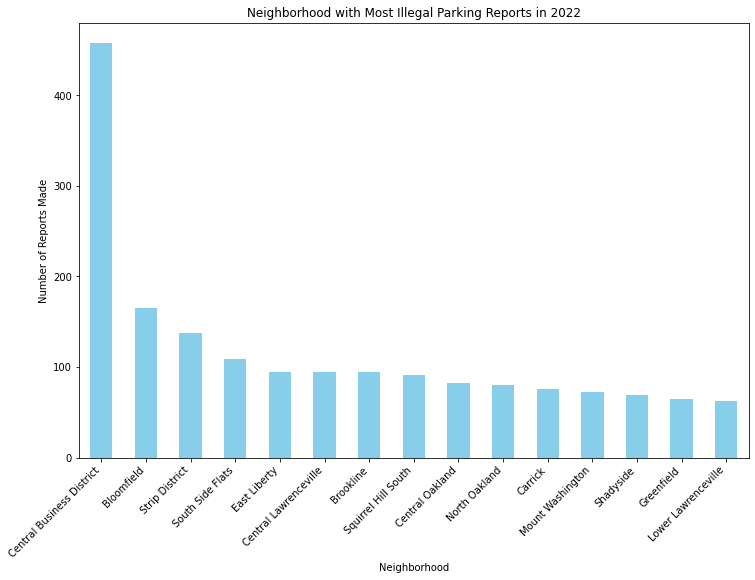

In [20]:
print("Illegal Parking")
print("--------------------------------")
parking_series_sorted= parking_series.sort_values(ascending=False)
print(parking_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
parking_series_sorted.head(15).plot(kind='bar', color='skyblue')
plt.title('Neighborhood with Most Illegal Parking Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

Speeding
--------------------------------
Brookline              25
Point Breeze           22
Homewood South         19
Brighton Heights       18
Carrick                18
Beechview              16
Squirrel Hill South    15
NaN                    14
Knoxville              12
Lower Lawrenceville     9
Greenfield              9
Marshall-Shadeland      8
Bon Air                 8
Perry South             8
Stanton Heights         8
dtype: int64


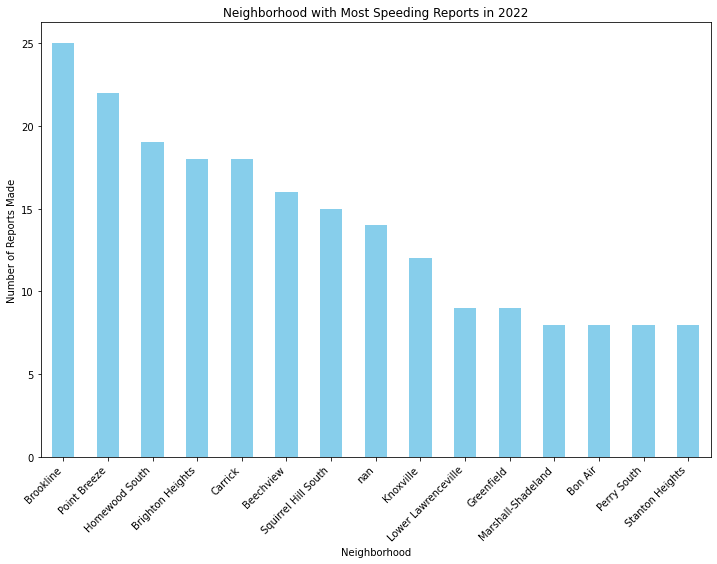

In [21]:
print("Speeding")
print("--------------------------------")
speeding_series_sorted= speeding_series.sort_values(ascending=False)
print(speeding_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
speeding_series_sorted.head(15).plot(kind='bar', color='skyblue')
plt.title('Neighborhood with Most Speeding Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

## Calculating the Worst Neighborhood for Pedestrians
I gathered the total for each section and added it to a new dictionary (to later make a series for analysis). I later sorted it to find the neighborhood with the most reports in these areas to make my conclusion of which neighborhood is the best/worst for pedestrians

In [22]:
total_dict = {}

#search through the four dictionaries to get a total
for ngh in sidewalk_dict.keys(): #for each neighborhood in sidewalk
    total_dict[ngh] = sidewalk_dict[ngh] #add the neighborhood to total_dict with the value of the sidewalk_dict[ngh] 

#for each, check if its in the total_dict and if not add it--> covers possible errors
for ngh in parking_dict.keys():
    if ngh not in total_dict:
        total_dict[ngh]= parking_dict[ngh]
    else:
        total_dict[ngh] += parking_dict[ngh] #just add parking values to existing values

for ngh in streetlight_dict.keys():
    if ngh not in total_dict:
        total_dict[ngh]= streetlight_dict[ngh]
    else:
        total_dict[ngh] += streetlight_dict[ngh]

for ngh in speeding_dict.keys():
    if ngh not in total_dict:
        total_dict[ngh]= speeding_dict[ngh]
    else:
        total_dict[ngh] += speeding_dict[ngh] 

total_series= pd.Series(total_dict) #turn it into a series
total_sorted_worst= total_series.sort_values(ascending=False) #neighborhoods with the most amount of 311 reports
total_sorted_best= total_series.sort_values(ascending=True) #neighborhoods with the least amount of 311 reports

Below is a table and graphic representation of the worst neighborhood for pedestrians
--------------------------------
Central Business District    583
Squirrel Hill South          257
Brookline                    249
Bloomfield                   243
South Side Flats             231
Shadyside                    181
Carrick                      173
Strip District               167
East Liberty                 156
Mount Washington             144
Squirrel Hill North          140
Greenfield                   140
Beechview                    138
Central Lawrenceville        138
North Oakland                122
dtype: int64


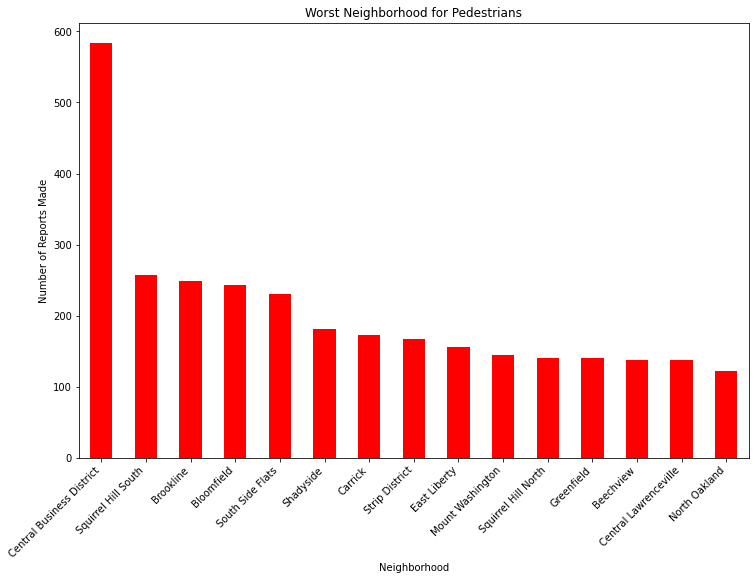

In [23]:
print("Below is a table and graphic representation of the worst neighborhood for pedestrians")
print("--------------------------------")
print(total_sorted_worst.head(15)) #print the first 15 values


#make a graph! :)
plt.figure(figsize=(12,8))
total_sorted_worst.head(15).plot(kind='bar', color='red')
plt.title('Worst Neighborhood for Pedestrians')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

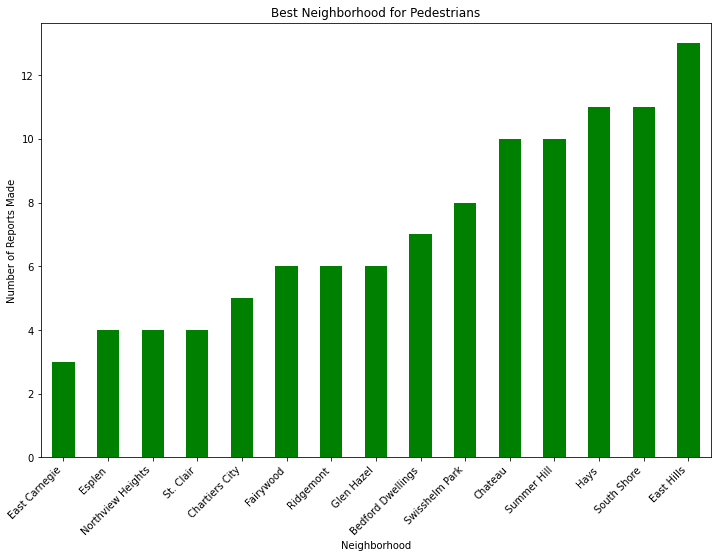

In [24]:
#make a graph! :)
plt.figure(figsize=(12,8))
total_sorted_best.head(15).plot(kind='bar', color='green')
plt.title('Best Neighborhood for Pedestrians')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

### Creating a GeoPandas Map

In [25]:
# series --> dataframe
best_df = pd.DataFrame(total_sorted_best).reset_index()
best_df.columns= ['Neighborhood', '311 Civilian Safety Hazards Reported']
best_df

,Neighborhood,311 Civilian Safety Hazards Reported
0,East Carnegie,3
1,Esplen,4
2,Northview Heights,4
3,St. Clair,4
4,Chartiers City,5
...,...,...
84,South Side Flats,231
85,Bloomfield,243
86,Brookline,249
87,Squirrel Hill South,257


In [26]:
import geopandas as gpd

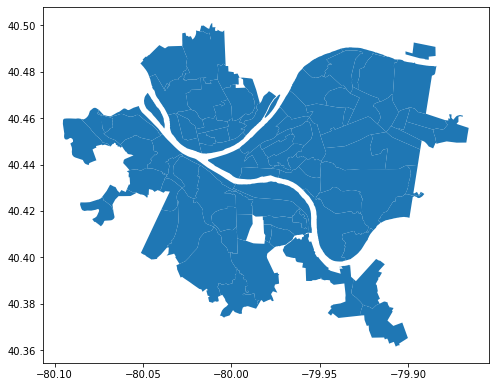

In [30]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") #shapefile
neighborhoods.plot(figsize=(8,10)) # plot the geopandas dataframe

In [28]:
#take our data and merge it with the neighborhoods data
best_ngh_map= neighborhoods.merge(best_df, how='left', left_on='hood', right_on='Neighborhood')
best_ngh_map[['hood', '311 Civilian Safety Hazards Reported', 'geometry']].head()

,hood,311 Civilian Safety Hazards Reported,geometry
0,Central Oakland,106.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,122.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,27.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,21.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,167.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


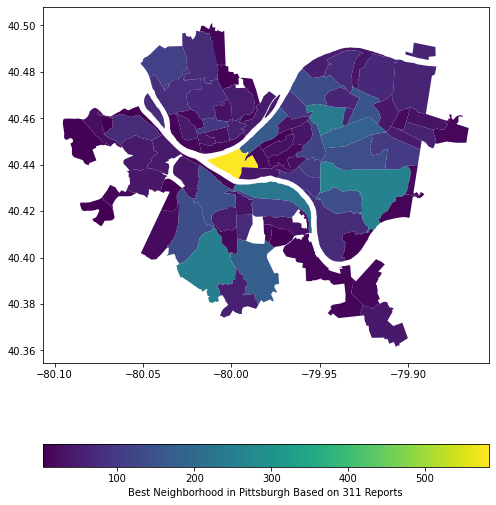

In [29]:
#creates a map that color represents the value of specified variable
best_ngh_map.plot(column='311 Civilian Safety Hazards Reported', legend=True, legend_kwds={'label': "Best Neighborhood in Pittsburgh Based on 311 Reports", 'orientation': "horizontal"}, figsize= (8,10))

### Conclusion
My data shows that East Carnegie is the best neighborhood. However, I feel that if I had time to analyze more data sets, the data might suggest that another neighborhood is better.